In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/MyDrive/colab/gda/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

FileNotFoundError: ignored

In [ ]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])


# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  play  day  time
0         2     1         0      0     0    1     0
1         2     1         0      1     0    5     0
2         0     1         0      0     1    6     0
3         1     2         0      0     1    1     1
4         1     0         1      0     1    5     1
5         1     0         1      1     0    6     1
6         0     0         1      1     1    4     1
7         2     2         0      0     0    4     0
8         2     0         1      0     1    0     1
9         1     2         1      0     1    0     0
10        2     2         1      1     1    2     0
11        0     2         0      1     1    2     1
12        0     1         1      0     1    3     0
13        1     2         0      1     0    3     1


In [ ]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    1     0
1         2     1         0      1    5     0
2         0     1         0      0    6     0
3         1     2         0      0    1     1
4         1     0         1      0    5     1
5         1     0         1      1    6     1
6         0     0         1      1    4     1
7         2     2         0      0    4     0
8         2     0         1      0    0     1
9         1     2         1      0    0     0
10        2     2         1      1    2     0
11        0     2         0      1    2     1
12        0     1         1      0    3     0
13        1     2         0      1    3     1

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

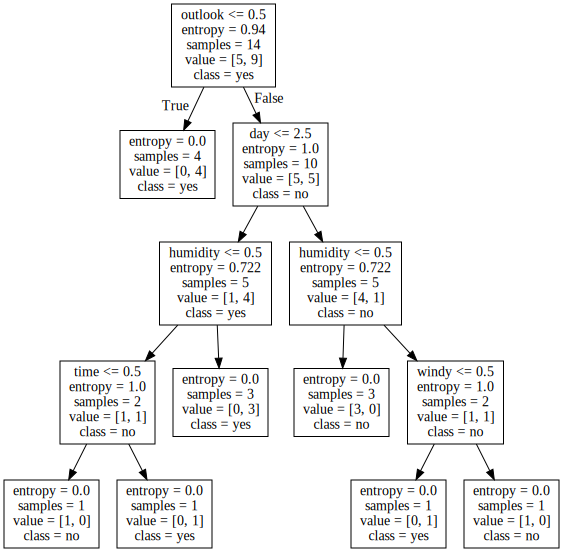

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [ ]:
#일련의 2주 동안의 데이터
#(월~일)까지를 한 세트로 보아 두 세트 치의 데이터(14일)
#2주동안의 데이터이므로 day(요일)은 기온과 습도에 영향을 크게 미치지 않을것으로 판단
#time(시각)은 기온과 습도에 가장 영향을 미칠것으로 판단
#대체적으로 기온과 습도는 정비례하는 관계(그러나 이는 고온다습한 여름, 저온저습한 겨울 등의 다른 시기일때 적용된다.)
#하루 중 습도는 대략 22시부터 다음날 10시까지 제일 높고 14시에서 17시 가량이 제일 낮으며 그 외의 시간대에는 평이하다.
#day와 time은 각자가 가상의 데이터를 입력하는 것이기에 위의 정보들을 사용하여 가장 어울리는 자리에 배치하려고 노력
#주어진 데이터를 분석해볼 때 temp와 humidity사이의 관계는 정비례한다. ex)hot - high, mild - high or normal(1:1비율), cool - normal
#이를 토대로 시간대를 선정하려 했으나 비오는날 humidity normal 등 실제 관측 기록과 맞추기 어려운 부분이 다수 존재
#따라서 주어진 데이터와 가장 비슷한 하루중 거의 가장 덥고 습도가 평이한 12시와 온도와 습도가 평이한 19시를 time으로 선정
#1주차에는 12시 2주차에는 19시를 time에 입력
